In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Loan_Default.csv")

In [3]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
df.drop(df[df['Gender'] == 'Sex Not Available'].index, inplace=True)

In [7]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0


In [8]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    2538
Gender                           0
approv_in_adv                  674
loan_type                        0
loan_purpose                   107
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             25872
Interest_rate_spread         25872
Upfront_charges              28054
term                            27
Neg_ammortization               92
interest_only                    0
lump_sum_payment                 0
property_value               10907
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        6425
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_applic

In [9]:
df.fillna({
    'income': df.income.median(),
    'rate_of_interest': df['rate_of_interest'].mode()[0],
    'Interest_rate_spread' : df['Interest_rate_spread'].mode()[0],
    'Upfront_charges': df['Upfront_charges'].mode()[0]
}, inplace=True)

In [10]:
df.Status.value_counts()

0    85139
1    25872
Name: Status, dtype: int64

In [11]:
df['rate_of_interest'].value_counts()

3.990    36116
3.625     7026
3.875     6579
3.750     6330
3.500     5158
         ...  
4.075        1
2.125        1
4.700        1
7.000        1
2.475        1
Name: rate_of_interest, Length: 122, dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.Status.value_counts()

0    76975
1    13830
Name: Status, dtype: int64

In [14]:
df.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90805 entries, 2 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         90805 non-null  int64  
 1   year                       90805 non-null  int64  
 2   loan_limit                 90805 non-null  object 
 3   Gender                     90805 non-null  object 
 4   approv_in_adv              90805 non-null  object 
 5   loan_type                  90805 non-null  object 
 6   loan_purpose               90805 non-null  object 
 7   Credit_Worthiness          90805 non-null  object 
 8   open_credit                90805 non-null  object 
 9   business_or_commercial     90805 non-null  object 
 10  loan_amount                90805 non-null  int64  
 11  rate_of_interest           90805 non-null  float64
 12  Interest_rate_spread       90805 non-null  float64
 13  Upfront_charges            90805 non-null  fl

In [16]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,90805.000000,90805.0,9.080500e+04,90805.000000,90805.000000,90805.000000,90805.000000,9.080500e+04,90805.000000,90805.000000,90805.000000,90805.000000,90805.000000
mean,99137.372457,2019.0,3.417841e+05,4.067249,0.371554,2581.125020,335.745477,5.209261e+05,7197.029238,699.385562,71.812422,0.152304,37.724476
std,42938.235544,0.0,1.849771e+05,0.500922,0.476757,3139.374382,58.005671,3.760915e+05,6557.885957,115.845342,18.908639,0.359318,10.515011
min,24892.000000,2019.0,1.650000e+04,2.125000,-1.039000,0.000000,96.000000,2.800000e+04,0.000000,500.000000,0.967478,0.000000,5.000000
25%,61839.000000,2019.0,2.065000e+05,3.750000,-0.028000,0.000000,360.000000,2.880000e+05,3900.000000,599.000000,59.920635,0.000000,31.000000
50%,98977.000000,2019.0,3.165000e+05,3.990000,0.266000,1539.290000,360.000000,4.380000e+05,5940.000000,699.000000,74.497487,0.000000,39.000000
75%,136313.000000,2019.0,4.565000e+05,4.375000,0.653700,4119.030000,360.000000,6.580000e+05,8760.000000,800.000000,85.287081,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,377220.000000,900.000000,237.500000,1.000000,61.000000


In [17]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [18]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0


In [20]:
df.reset_index(inplace=True)

In [21]:
df.head()

,index,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
1,3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
2,4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
3,5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
4,6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0


In [22]:
df.drop(["index"], axis=1, inplace=True)

In [23]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
X = df.drop("Status", axis=1)
y = df.Status

In [27]:
X.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,46.0
1,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,42.0
2,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,39.0
3,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,10080.0,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,40.0
4,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,5040.0,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,44.0


In [28]:
X.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'dtir1'],
      dtype='object')

In [29]:
X.drop(['ID', "year"], axis=1, inplace=True)

In [30]:
X.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,46.0
1,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,42.0
2,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,39.0
3,cf,Joint,pre,type1,p1,l1,nopc,nob/c,706500,3.99,...,10080.0,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,40.0
4,cf,Joint,pre,type1,p3,l1,nopc,nob/c,346500,4.50,...,5040.0,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,44.0


In [31]:
for col in list(X.columns):
    X[col] = le.fit_transform(X[col])

In [32]:
X.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,0,2,1,0,0,0,0,1,39,89,...,158,3,334,0,1,1,6385,3,1,41
1,0,2,0,0,3,0,0,1,44,77,...,198,3,87,0,2,0,5570,0,1,37
2,0,1,1,0,0,0,0,1,68,67,...,174,1,102,1,0,0,6953,0,1,34
3,0,1,1,0,0,0,0,1,69,66,...,168,3,364,1,1,0,5653,0,1,35
4,0,1,1,0,2,0,0,1,33,87,...,84,3,360,1,3,1,6288,0,1,39


In [33]:
y.value_counts()

0    76975
1    13830
Name: Status, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [38]:
X_train.shape

(72644, 31)

In [39]:
y_train.shape

(72644,)

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfs = RandomForestClassifier(n_estimators = 50, max_depth = 5)

In [42]:
rfs.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [43]:
train_pred = rfs.predict(X_train)

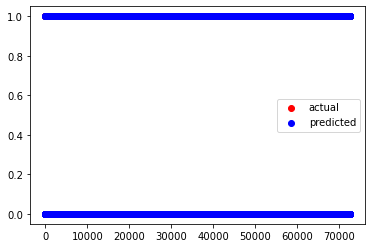

In [44]:
n = np.arange(len(X_train))
plt.scatter(n, y_train, color='red', label='actual')
plt.scatter(n, train_pred, color='blue', label='predicted')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [49]:
accuracy_score(y_train, train_pred)

0.9964209019327129

In [50]:
f1_score(y_train, train_pred)

0.9880327717941637

In [52]:
cm = confusion_matrix(y_train, train_pred)
cm

array([[61651,     5],
       [  255, 10733]], dtype=int64)

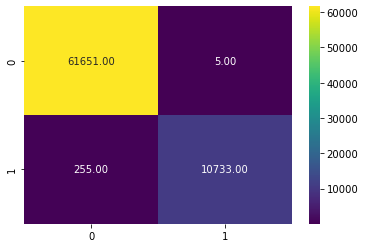

In [59]:
sns.heatmap(cm, cmap='viridis', annot=True, fmt='.2f')
plt.show()

In [57]:
test_pred = rfs.predict(X_test)

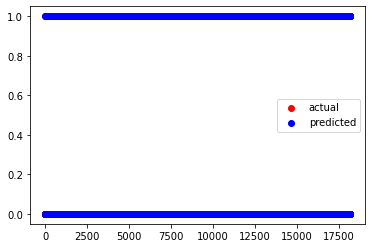

In [58]:
n = np.arange(len(X_test))
plt.scatter(n, y_test, color='red', label='actual')
plt.scatter(n, test_pred, color='blue', label='predicted')
plt.legend()
plt.show()

In [60]:
accuracy_score(y_test, test_pred)

0.9968614063102252

In [61]:
precision_score(y_test, test_pred)

0.9996411912450663

In [63]:
recall_score(y_test, test_pred)

0.9802955665024631

In [64]:
f1_score(y_test, test_pred)

0.9898738674720199

In [65]:
cm = confusion_matrix(y_test, test_pred)
cm

array([[15318,     1],
       [   56,  2786]], dtype=int64)

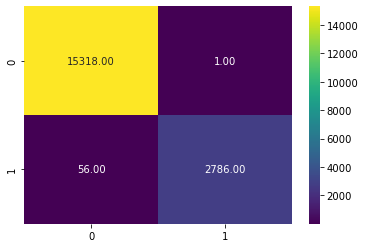

In [66]:
sns.heatmap(cm, cmap='viridis', annot=True, fmt='.2f')
plt.show()

In [67]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15319
           1       1.00      0.98      0.99      2842

    accuracy                           1.00     18161
   macro avg       1.00      0.99      0.99     18161
weighted avg       1.00      1.00      1.00     18161

